In [1]:
# Exemplo de Agrupamento (Clustering) de Machine Learning utilizando o dataset:
# iris
# e com o algoritmo de K-Means

import pandas as pd
import io

In [3]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [4]:
# carregando o arquivo para o dataframe iris
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [5]:
# mostrando os dados no dataframe iris
iris.head()

,comprimento-sepala,largura-sepala,comprimento-petala,largura-petala,classificacao
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Para saber sobre o que é sépala e pétala consulte:
https://www.sobiologia.com.br/conteudos/Morfofisiologia_vegetal/morfovegetal8.php

In [6]:
# verificando os tipos do dados
iris.dtypes

comprimento-sepala    float64
largura-sepala        float64
comprimento-petala    float64
largura-petala        float64
classificacao          object
dtype: object

In [7]:
# dividindo os dados entre variáveis dependentes ( X ) e independente ( y )
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]


In [8]:
# importando bibliotecas para aplicar a classificação de Machine Learning
from sklearn.cluster import KMeans

In [9]:
# aplicando o kmeans no conjunto de variáveis dependentes
# desta forma omitimos as classes de cada instância de flor
# definindo 3 como o número de clusters - k

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X_clustered = kmeans.fit_predict(X)

In [10]:
# para verificar o agrupamento podemos criar uma tabela de resultados contendo a coluna das classes esperadas
# e a coluna dos clusters criados:
resultado = iris[['classificacao']].copy()
resultado['numero-cluster'] = X_clustered


In [11]:
# visualizando o resultado:
resultado

,classificacao,numero-cluster
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,0
146,Iris-virginica,2
147,Iris-virginica,0
148,Iris-virginica,0


In [12]:
# vamos verificar os acertos
quantidade = iris.groupby("classificacao")["classificacao"].count()


In [13]:
# visualizando a quantidade
quantidade.head()

classificacao
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classificacao, dtype: int64

In [15]:
# vamos verificar os acertos
quantidadeNova = resultado.groupby("numero-cluster")["numero-cluster"].count()

In [16]:
# visualizando a quantidade
quantidadeNova.head()

numero-cluster
0    38
1    50
2    62
Name: numero-cluster, dtype: int64

In [17]:
# aplicação do Método Cotovelo, onde o KMeans é executado várias vezes com diferentes quantidades de clusters
# para indicar qual é o número ótimo de clusters
# utilizando a soma dos quadrados intra-clusters
def calcular_cluster(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [18]:
# excluindo a classificacao dos dados, mantendo somente os valores
cotovelo = iris.drop('classificacao', axis=1)

In [19]:
# calculando o cluster, para isto executando a função
calcular_cluster(cotovelo)

[152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.964787851037855,
 34.28464983108679,
 29.963345571095573,
 28.212540935672514,
 26.580944911126025,
 24.27805459899578,
 22.79127242348295,
 21.576753808103927,
 20.424332689369454,
 19.27000865800866,
 17.71079936729937,
 17.0872905982906,
 16.425385939224178,
 15.609051438757323,
 14.83964643689644]

In [20]:
# salvando o resultado para poder visualizar como gráfico
saida = calcular_cluster(cotovelo)

In [21]:
# importar biblioteca gráfica para plotar
import matplotlib.pyplot as plt

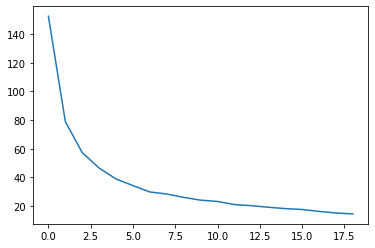

In [22]:
# visualizando o gráfico com a saida
plt.plot(saida)